In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import t
from scipy.stats import norm

### Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [21]:
# 1. Загрузить файл hr.csv
data = pd.read_csv('HR.csv')
data.head()
# satisfaction_level - уровень удовлетворенности
# last_evaluation - последняя оценка
# number_project - номер проекта
# average_montly_hours - средние часы в месяц
# time_spend_company - стаж в компании (лет)
# work_accident - несчастный случай на работе
# left - уволен
# promotion_last_5years - повышения за последние 5 лет
# sales - отдел
# salary - зарплата

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [23]:
# Возьмем только числовые столбцы
values = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',\
                               'time_spend_company','work_accident','left','promotion_last_5years']
data1 = data[values] # Создадим новый массив без текстовы стобцов
out = pd.DataFrame({'name': values})


def get_mode(ax):
    try:
        return round(statistics.mode(ax),3)
    except:
        return '---'

out.insert(1, "Среднее", data1.apply(lambda x: round(statistics.mean(x), 3)).values)
out.insert(2, "Медиана", data1.apply(lambda x: round(statistics.median(x), 3)).values)
out.insert(3, "Мода", data1.apply(get_mode).values)
out.insert(4, "Минимум", data1.apply(lambda x: round(min(x), 3)).values)
out.insert(5, "Максимум", data1.apply(lambda x: round(max(x), 3)).values)
out.insert(6, "Сред.отклонение", data1.apply(lambda x: round(statistics.pstdev(x), 3)).values)

out

,name,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение
0,satisfaction_level,0.613,0.64,0.1,0.09,1.0,0.249
1,last_evaluation,0.716,0.72,0.55,0.36,1.0,0.171
2,number_project,3.803,4.00,4,2.00,7.0,1.233
3,average_montly_hours,201.050,200.00,---,96.00,310.0,49.941
4,time_spend_company,3.498,3.00,3,2.00,10.0,1.460
5,work_accident,0.145,0.00,0,0.00,1.0,0.352
6,left,0.238,0.00,0,0.00,1.0,0.426
7,promotion_last_5years,0.021,0.00,0,0.00,1.0,0.144


In [ ]:
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [24]:
data1.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


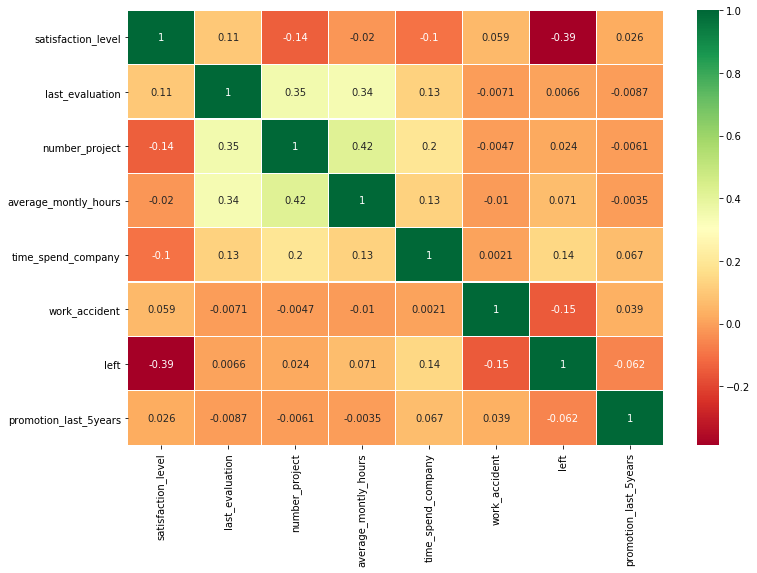

In [25]:
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
# 4. Визуализировать несколько взаимосвязей между переменными.

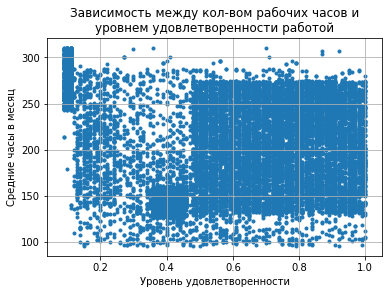

In [114]:
fig, ax = plt.subplots()
ax.scatter(data['satisfaction_level'], data['average_montly_hours'], marker='.')
ax.grid(True)
plt.xlabel("Уровень удовлетворенности")
plt.ylabel("Средние часы в месяц")
plt.title("Зависимость между кол-вом рабочих часов и\nуровнем удовлетворенности работой")
plt.show()
# Как можно увидеть, то удовлетвореннось работой присутствует от 130 до 270 часов в месяц
# Но начиная от 240 часов и более у работников появляется крайняя неудовлетворенность работой (см. слева вверху)
# Также есть небольшой квадрат от 130 до 160 часов когда люди не особо удвлетворены работой 
# (примерно 4 балла из 10)

Корреляция недовольных работой: (-0.6528841871920337, 0.0)
Корреляция довольных работой: (0.06136700324559392, 3.65246957686736e-10)


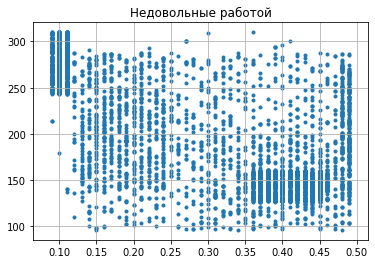

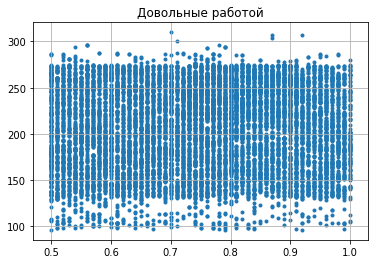

In [113]:
# Попробуем найти корреляции Пиросна для 2 частей: 
#от 0 до 0,5 - для тех кто недоволен и от 0,5 до 1 - для тех кто доволен работой
data2a = data[data['satisfaction_level']<0.5]
corr_a = pearsonr(data2a['satisfaction_level'], data2a['average_montly_hours'])
print('Корреляция недовольных работой:',corr_a)

fig, ax = plt.subplots()
ax.scatter(data2a['satisfaction_level'], data2a['average_montly_hours'], marker='.')
ax.grid(True)
plt.title("Недовольные работой")

data2b = data[data['satisfaction_level']>=0.5]
corr_b = pearsonr(data2b['satisfaction_level'], data2b['average_montly_hours'])
print('Корреляция довольных работой:',corr_b)

fig, ax = plt.subplots()
ax.scatter(data2b['satisfaction_level'], data2b['average_montly_hours'], marker='.')
ax.grid(True)
plt.title("Довольные работой")
plt.show()

# Правая часть графика, где в основном довольные люди мало коррелирована и по ней сложно что-то сказать
# А вот по левой части, где недовольные сотрудники мы видим обратную корреляцию по кол-ву рабочих часов
# Т.е. чем больше рабочих часов, тем недовольство возрастает

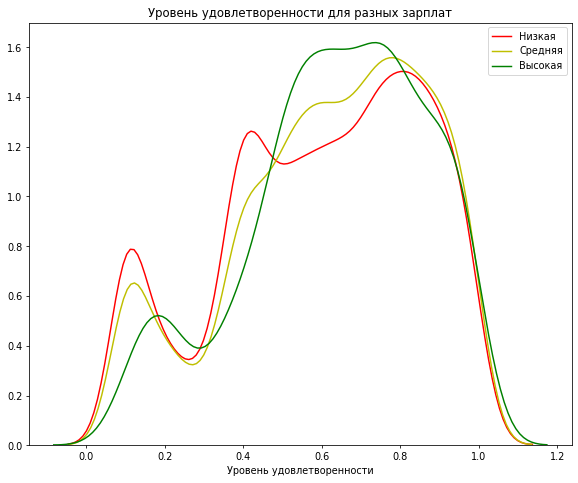

In [28]:
# Возможно недовольство как-то связано с размером заработной платы или с отделом, где работает сотрудник
# Посмотрим заработную плату
plt.figure(figsize=(10,8), dpi= 70)
sns.kdeplot(data.loc[data['salary'] == 'low', "satisfaction_level"], color="r", label="Низкая")
sns.kdeplot(data.loc[data['salary'] == 'medium', "satisfaction_level"], color="y", label="Средняя")
sns.kdeplot(data.loc[data['salary'] == 'high', "satisfaction_level"], color="g", label="Высокая")
plt.title('Уровень удовлетворенности для разных зарплат', fontsize=12)
plt.legend()
plt.xlabel("Уровень удовлетворенности")
plt.show()
# Как можно увидеть на графике, уровень зарплаты не сильно влияет на уровень удовлетворенности работой
# т.к. для всех 3 уровней зарплат графики похожи

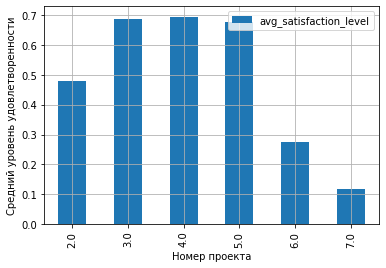

In [81]:
# Предположим, что на уровень удовлетворенности влияет работа над определенным кол-вом проектов
# Возьмем средний уровень удовлетворенности по каждому кол-ву проектов

data3 = pd.DataFrame()
numbers =  data.groupby(['number_project']).agg(['count'])['left']\
    .sort_values('number_project', ascending=False).reset_index()
for x in numbers['number_project']:
    data3 = data3.append({'number_project': x,\
            'avg_satisfaction_level': statistics.mean(data['satisfaction_level'][data['number_project']==x])},\
                        ignore_index=True)
data3 = data3.sort_values('number_project')
data3.plot.bar(x='number_project', y='avg_satisfaction_level')
plt.xlabel("Номер проекта")
plt.ylabel("Средний уровень удовлетворенности")
plt.grid()

# Как можно увдить из графика, наиболее довольны остаются сотрудники работаютщие над 3,4 и 5 проектами
# Наиболее недовольны остаются сотрудники 6 и 7 проектов (перегружены работой)
# И как видим удовлетворенность работой связана с кол-вом выполняемых проектов

In [ ]:
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [85]:
# Попробуем выдвинуть гипотезу, что среднее время рабочих часов у сотрудников, кто работает 3 года и более
# не отличается от среднего времени всех сотрудников организации
all_people = data['average_montly_hours']
more_3 = data[data['time_spend_company']>=3]['average_montly_hours']
print(sts.ttest_1samp(more_3, all_people.mean()))

Ttest_1sampResult(statistic=0.5329454431651698, pvalue=0.5940814223604931)


Text(0.5, 0, 'Кол-во часов')

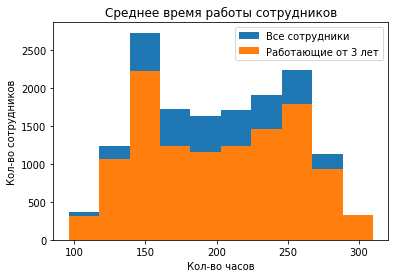

In [86]:
# Как можно увидеть по полученным данным t-критерий не превышает табличных данных и p-value>0.05
# Что значит, что выдвенная гипотеза подтверждается
# Посмотрим на графике
plt.hist(all_people)
plt.hist(more_3)
plt.title('Среднее время работы сотрудников')
plt.legend(['Все сотрудники', 'Работающие от 3 лет'])
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Кол-во часов')

In [87]:
# Теперь выдвинем гипотезу, что уровень удовлетворения одинаковый у уволившихсяя сотрудников
# и тех кто продолжает работать
left_0 = data[data['left']==0]['satisfaction_level']
left_1 = data[data['left']==1]['satisfaction_level']
print(sts.ttest_ind(left_0, left_1))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


Text(0.5, 0, 'Уровень удовлетворения')

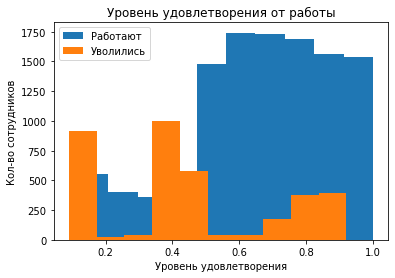

In [88]:
# Как можно увдиеть по цифрам, гипотеза не подтверждается, что может говорить о том, что уровень удовлетвроения
# работой влияет на увольнение сотрудников
# Посмотрим как это выглядит на графике
plt.hist(left_0)
plt.hist(left_1)
plt.title('Уровень удовлетворения от работы')
plt.legend(['Работают', 'Уволились'])
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Уровень удовлетворения')

In [89]:
# Третья гипотеза, которую мы выдвинем, что уровень удвлетворения для 3,4 и 5 проектов одинаковых
# (это проекты наиболее похожих по уровню, как было видно выше в пунке 4)
project_3 = data[data['number_project']==3]['satisfaction_level']
project_4 = data[data['number_project']==4]['satisfaction_level']
project_5 = data[data['number_project']==5]['satisfaction_level']
sts.f_oneway(project_3, project_4, project_5)

F_onewayResult(statistic=5.209168264676829, pvalue=0.0054794957593774125)

Text(0.5, 0, 'Уровень удовлетворения')

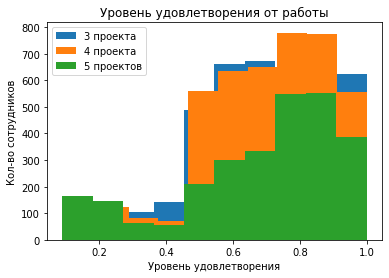

In [92]:
# Как можно увдиеть по данным, то все эти 3 группы не схожи между собой
# Построим графики данных 
plt.hist(project_3)
plt.hist(project_4)
plt.hist(project_5)
plt.title('Уровень удовлетворения от работы')
plt.legend(['3 проекта', '4 проекта','5 проектов'])
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Уровень удовлетворения')
# По ним видно, что 3 и 4 проекта наиболее похожи между собой по уровню довольства и имееют наибольший уровень

In [91]:
# 6. Рассчитать сколько работников работает в каждом департаменте.
result6 = data.groupby('sales').agg(['count'])['satisfaction_level'].sort_values('count', ascending=False)
result6
# Основное кол-во сотрундиков работает в отделе продаж, тех.отделе и поддержке
# Меньше всего в управлении и HR

,count
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [14]:
# 7. Показать распределение сотрудников по зарплатам.
result7 = data.groupby('salary').agg(['count'])['satisfaction_level'].sort_values('count', ascending=False)
result7['percent'] = round((result7['count'] / result7.sum()['count'])*100, 1)
result7
# В компании почти половина сотрудников имеет низкий доход, 43% имеет средний доход и только 8.2% высокий

,count,percent
salary,,
low,7316,48.8
medium,6446,43.0
high,1237,8.2


In [15]:
# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
# импортируем нужные библиотеки
import matplotlib.pyplot as plt
import re

# Сначала посчитаем распределение сотрудников по зарплатам в каждом отедел
result8 = data.groupby(['sales','salary']).agg(['count'])['satisfaction_level'].sort_values(['salary'],\
                                                                                            ascending=False)
result8

,,count
sales,salary,
technical,medium,1147
accounting,medium,335
product_mng,medium,383
marketing,medium,376
management,medium,225
support,medium,942
hr,medium,359
RandD,medium,372
IT,medium,535


In [16]:
# А затем построим график, чтобы увидеть в процентром отношении какие отедлы какую зарплату получают
graph8 = result8.div(result6, level='sales')*100
graph8.style.bar()
# Как можно увдить из гарфика ниже самую высокую зарплату получает отдел управления, бухгалтерия и маркетинг 
# Отделы с наибольшим кол-вом специалистов с низкой зарплатой - отдел продаж, тех.отдел и поддержка, а это, как мы видили
# выше, самые большие по числености отделы

,,count
sales,salary,
technical,medium,42.169118
accounting,medium,43.676662
product_mng,medium,42.461197
marketing,medium,43.822844
management,medium,35.714286
support,medium,42.261104
hr,medium,48.579161
RandD,medium,47.268107
IT,medium,43.602282


In [94]:
# 9. Сколько сотрудников покинули компанию.
result9 = data[data['left']==1].agg(['count'])['satisfaction_level']
print(f"Компанию покинуло сотрудников: {result9['count']}")

Компанию покинуло сотрудников: 3571


In [ ]:
# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

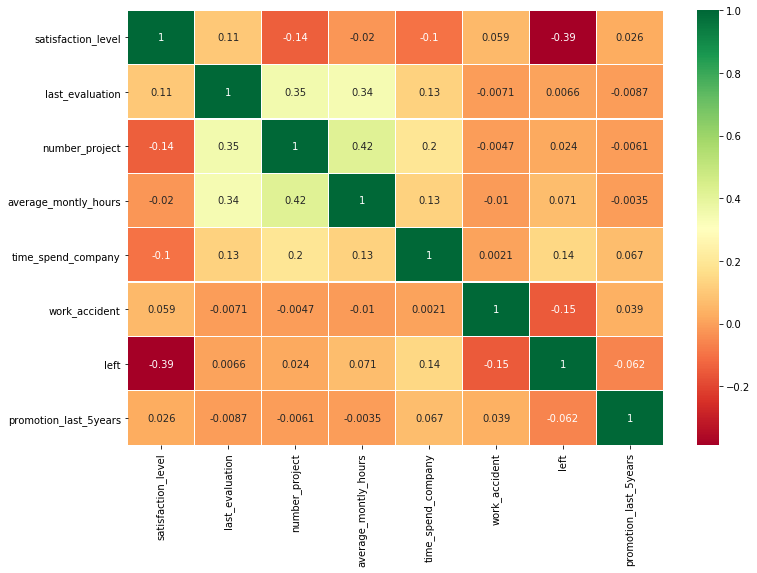

In [97]:
# Обратимся снова к корреляционной матрице
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [119]:
# Как можно увдиеть поле Left наиболее сильно коррелируется с колонками satisfaction_level, time_spend_company 
# и work_accident. Рассмотрим кажое из значений.
# 1. satisfaction_level
fig, ax = plt.subplots()
ax.scatter(data[data[['satisfaction_level','left']], marker='.')
ax.grid(True)
plt.xlabel("Уровень удовлетворенности")
plt.ylabel("Средние часы в месяц")
plt.title("Зависимость между кол-вом рабочих часов и\nуровнем удовлетворенности работой")
plt.show()

SyntaxError: invalid syntax (<ipython-input-119-7e1bbd118c36>, line 5)